LAB - Map excercise

Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

it is centred around San Francisco,
you use a zoom level of 12,
you use fill_color = 'YlOrRd',
you define fill_opacity = 0.7,
you define line_opacity=0.2, and,
you define a legend and use the default threshold scale.

### Import Libraries

In [1]:
import numpy as np  	# useful for many scientific computing in Pytho
import pandas as pd 	# primary data structure library

import requests # library to handle requests
import random # library for random number generation

import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

### data SetUp

In [2]:
df_setUp = pd.read_csv('Excel Files/setUp.csv')
index=2

In [3]:
df_setUp.loc[index,'City']

'London'

In [15]:
#for index, row in df_setUp.iterrows():
#    print(row['City'], row['Latitude'])

In [4]:
# Rome latitude and longitude values
latitude = df_setUp.loc[index,'Latitude']
longitude = df_setUp.loc[index,'Longitude']

df_incidents = pd.read_csv(df_setUp.loc[index,'Incident_File'])
#df_incidents = pd.read_csv('https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv')
print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.rename(columns={'Neighborhood':'District'}, inplace=True)

df_incidents.head()		# look at the top 5 rows
df_incidents.shape		# look at no columns and rows of the dataset

#limit = 100			
#df_incidents = df_incidents.iloc[0:limit, :]	#to limit at top 100 incident

df_incidents.head()
df_incidents

Dataset downloaded and read into a pandas dataframe!


,District,Count
0,Barnet,1000
1,Bexley,2000
2,Brent,3000
3,Bromley,4000
4,Camden,5000
5,City,6000
6,Croydon,7000
7,Wesminster,8000
8,Ealing,9000
9,Enfield,10000


In [16]:
# download countries geojson file
#!wget --quiet https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json -O world_countries.json
    
#print('GeoJSON file downloaded!')

In [5]:
world_geo = df_setUp.loc[index,'GEOJSON_File'] # geojson file

# create map and display it
xMap = folium.Map(location=[latitude, longitude], zoom_start=11,tiles='Stamen Terrain')

xMap

In [6]:
xMap.choropleth(
    geo_data=world_geo,
    data=df_incidents,
    columns=['District', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Heatmap'
)

xMap

Foursquare credential

In [7]:
CLIENT_ID = 'DILKXQYS0LWVYFI0LOZ11ND2LKCSMVYTAV4JMK5AKV04CYO5'
CLIENT_SECRET = 'AHHELCPGWFMMNHQEWBT2CBQH5TMS3E15FDIUQSCGYAINSFUT'

#CLIENT_ID = 'your-client-ID' # your Foursquare ID
#CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DILKXQYS0LWVYFI0LOZ11ND2LKCSMVYTAV4JMK5AKV04CYO5
CLIENT_SECRET:AHHELCPGWFMMNHQEWBT2CBQH5TMS3E15FDIUQSCGYAINSFUT


In [8]:
# Create a repository dataframe
dfObj = pd.DataFrame(columns=['City', 'District', 'Latitude','Longitude','NoRestaurant'])
 
print("Empty Dataframe ", dfObj, sep='\n')

Empty Dataframe 
Empty DataFrame
Columns: [City, District, Latitude, Longitude, NoRestaurant]
Index: []


In [9]:
for label, row in df_incidents.iterrows():
    address=row['District']
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
#    print(str(label) +' - '+row['District'],latitude, longitude)
#    print(address, latitude, longitude)

    search_query = 'Italian'
    radius = 3000
#    print(search_query + ' .... OK!')

## Define the corresponding URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    
## Send the GET Request and examine the results
    results = requests.get(url).json()

## Get relevant part of JSON and transform it into a pandas dataframe
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    print(str(label) +' - District: '+row['District'],latitude, longitude,' - No. Italian Restaurant = ',dataframe.size)

#    print ('no. italian restaurant = ',dataframe.size)
    
    dfObj = dfObj.append({'City': df_setUp.loc[index,'City'], 'District': row['District'], 'Latitude': latitude, 'Longitude': longitude, 'NoRestaurant':dataframe.size}, ignore_index=True)

0 - District: Barnet 44.297316 -72.049713  - No. Italian Restaurant =  0
1 - District: Bexley 51.4416793 0.150488  - No. Italian Restaurant =  64
2 - District: Brent 39.0547833 -84.4335518  - No. Italian Restaurant =  13
3 - District: Bromley 51.4028046 0.0148142  - No. Italian Restaurant =  32
4 - District: Camden 39.9448402 -75.1198911  - No. Italian Restaurant =  720
5 - District: City 51.5156177 -0.0919983  - No. Italian Restaurant =  540
6 - District: Croydon 51.3713049 -0.101957  - No. Italian Restaurant =  51
7 - District: Wesminster 37.711915 -90.422177  - No. Italian Restaurant =  0
8 - District: Ealing 51.5126553 -0.3051952  - No. Italian Restaurant =  162
9 - District: Enfield 50.7164496 -106.6621329  - No. Italian Restaurant =  0
10 - District: Greenwich 52.0367323 1.168934  - No. Italian Restaurant =  32
11 - District: Hackney 51.5432402 -0.0493621  - No. Italian Restaurant =  180
12 - District: Hammersmith and Fullham 51.4848706 -0.201881535655002  - No. Italian Restauran

In [10]:
print("Dataframe Contens ", dfObj, sep='\n')

Dataframe Contens 
      City                 District   Latitude   Longitude NoRestaurant
0   London                   Barnet  44.297316  -72.049713            0
1   London                   Bexley  51.441679    0.150488           64
2   London                    Brent  39.054783  -84.433552           13
3   London                  Bromley  51.402805    0.014814           32
4   London                   Camden  39.944840  -75.119891          720
5   London                     City  51.515618   -0.091998          540
6   London                  Croydon  51.371305   -0.101957           51
7   London               Wesminster  37.711915  -90.422177            0
8   London                   Ealing  51.512655   -0.305195          162
9   London                  Enfield  50.716450 -106.662133            0
10  London                Greenwich  52.036732    1.168934           32
11  London                  Hackney  51.543240   -0.049362          180
12  London  Hammersmith and Fullham  51.48487

In [11]:
dfObj['rate'] = np.random.randint(1000, 8000, dfObj.shape[0])

In [12]:
dfObj.to_csv(df_setUp.loc[index,'Output_File'])

In [13]:
dfObj.head()

,City,District,Latitude,Longitude,NoRestaurant,rate
0,London,Barnet,44.297316,-72.049713,0,3383
1,London,Bexley,51.441679,0.150488,64,7907
2,London,Brent,39.054783,-84.433552,13,2100
3,London,Bromley,51.402805,0.014814,32,4118
4,London,Camden,39.944840,-75.119891,720,6146


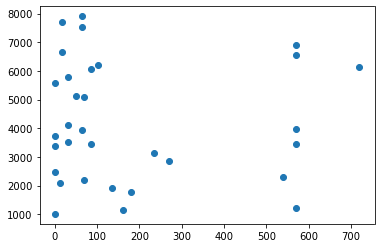

In [14]:
import matplotlib.pyplot as plt

#plt.scatter(dfObj.NoRestaurant, dfObj.rate, s=dfObj.District)
plt.scatter(dfObj.NoRestaurant, dfObj.rate)
plt.show()

K-Mean alghoritm application

CORRELATION

In [15]:
import seaborn as sns

wh1 = dfObj[['rate','Longitude','Latitude','NoRestaurant']]
wh1Label=dfObj['District']
wh1.dtypes

wh1["NoRestaurant"] = wh1.NoRestaurant.astype(int)
wh1.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


rate              int64
Longitude       float64
Latitude        float64
NoRestaurant      int64
dtype: object

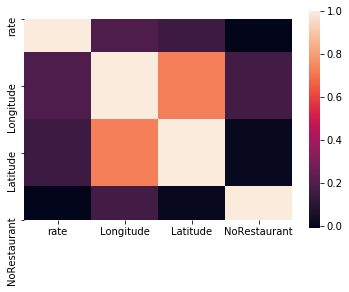

In [16]:
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) 

K-MEAN

In [17]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 4)
kmeans = pd.DataFrame(clust_labels)

wh1.insert((wh1.shape[1]),'kmeans',kmeans)

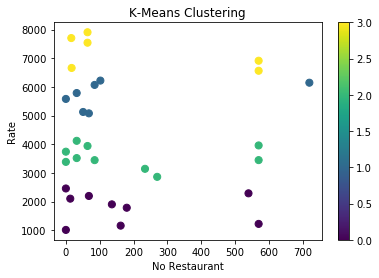

In [18]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['NoRestaurant'],wh1['rate'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('No Restaurant')
ax.set_ylabel('Rate')
plt.colorbar(scatter)

In [19]:
kmeans

,0
0,2
1,3
2,0
3,2
4,1
5,0
6,1
7,0
8,0
9,1


In [20]:
dfObj

,City,District,Latitude,Longitude,NoRestaurant,rate
0,London,Barnet,44.297316,-72.049713,0,3383
1,London,Bexley,51.441679,0.150488,64,7907
2,London,Brent,39.054783,-84.433552,13,2100
3,London,Bromley,51.402805,0.014814,32,4118
4,London,Camden,39.944840,-75.119891,720,6146
5,London,City,51.515618,-0.091998,540,2286
6,London,Croydon,51.371305,-0.101957,51,5125
7,London,Wesminster,37.711915,-90.422177,0,2455
8,London,Ealing,51.512655,-0.305195,162,1158
9,London,Enfield,50.716450,-106.662133,0,5580


In [21]:
result = pd.concat([kmeans, dfObj], axis=1, join='inner')

In [22]:
result

,0,City,District,Latitude,Longitude,NoRestaurant,rate
0,2,London,Barnet,44.297316,-72.049713,0,3383
1,3,London,Bexley,51.441679,0.150488,64,7907
2,0,London,Brent,39.054783,-84.433552,13,2100
3,2,London,Bromley,51.402805,0.014814,32,4118
4,1,London,Camden,39.944840,-75.119891,720,6146
5,0,London,City,51.515618,-0.091998,540,2286
6,1,London,Croydon,51.371305,-0.101957,51,5125
7,0,London,Wesminster,37.711915,-90.422177,0,2455
8,0,London,Ealing,51.512655,-0.305195,162,1158
9,1,London,Enfield,50.716450,-106.662133,0,5580


In [23]:
result.rename(columns={'0':'kMean'}, inplace=True)

In [24]:
result

,0,City,District,Latitude,Longitude,NoRestaurant,rate
0,2,London,Barnet,44.297316,-72.049713,0,3383
1,3,London,Bexley,51.441679,0.150488,64,7907
2,0,London,Brent,39.054783,-84.433552,13,2100
3,2,London,Bromley,51.402805,0.014814,32,4118
4,1,London,Camden,39.944840,-75.119891,720,6146
5,0,London,City,51.515618,-0.091998,540,2286
6,1,London,Croydon,51.371305,-0.101957,51,5125
7,0,London,Wesminster,37.711915,-90.422177,0,2455
8,0,London,Ealing,51.512655,-0.305195,162,1158
9,1,London,Enfield,50.716450,-106.662133,0,5580


In [25]:
dfObj.to_csv(df_setUp.loc[index,'Cluster_File'])

### CONCLUSION

In [26]:
index=2

# Rome latitude and longitude values
latitude = df_setUp.loc[index,'Latitude']
longitude = df_setUp.loc[index,'Longitude']

df_incidents = pd.read_csv(df_setUp.loc[index,'GeoCluster_File'])
#df_incidents = pd.read_csv('https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv')
print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.rename(columns={'Neighborhood':'District'}, inplace=True)

df_incidents.head()		# look at the top 5 rows
df_incidents.shape		# look at no columns and rows of the dataset

#limit = 100			
#df_incidents = df_incidents.iloc[0:limit, :]	#to limit at top 100 incident

df_incidents.head()
df_incidents

Dataset downloaded and read into a pandas dataframe!


,District,Color
0,Barnet,2000
1,Bexley,4000
2,Brent,4000
3,Bromley,2000
4,Camden,4000
5,City,1000
6,Croydon,1000
7,Wesminster,3000
8,Ealing,2000
9,Enfield,1000


In [27]:
world_geo = df_setUp.loc[index,'GEOJSON_File'] # geojson file

# create map and display it
xMap = folium.Map(location=[latitude, longitude], zoom_start=11,tiles='Stamen Terrain')

xMap

In [28]:
xMap.choropleth(
    geo_data=world_geo,
    data=df_incidents,
    columns=['District', 'Color'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Rate'
)

xMap